# 1. Install dependencies

In [2]:
!pip install -q vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.8 MB/s eta 0:00:00


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

# 2. Dataset loading

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
dataset_path = "/content/drive/MyDrive/ChatGPTAnalysisNLP/Data/tweets_dataframe_cleaned.csv"
tweets_dataframe = pd.read_csv(dataset_path)

In [6]:
tweets_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133026 entries, 0 to 133025
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  133026 non-null  object
 1   Tweet Id  133026 non-null  int64 
 2   Text      133026 non-null  object
 3   Username  133026 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
tweets_dataframe.head()

,Datetime,Tweet Id,Text,Username
0,2022-11-30 23:56:59+00:00,1598103832080584704,Twitter,1024pixels1
1,2022-11-30 23:56:04+00:00,1598103601507102720,Overall using AI to create art can expand the...,charis_ai
2,2022-11-30 23:56:02+00:00,1598103593634369536,Este prompt fue creado con el nuevo modelo de ...,alarcon7a
3,2022-11-30 23:54:08+00:00,1598103115060084736,Just played around with OpenAI s new model and...,anthonypak
4,2022-11-30 23:51:34+00:00,1598102468243599361,I asked to write me a story about Sova and Jet...,emargusity


# 3. Sentiment analysis using vaderSentiment

In [8]:
analyzer = SentimentIntensityAnalyzer()

def getSentiment(text):
    compound = analyzer.polarity_scores(text)['compound']
    if(compound >= 0.05):
      return 'positive'
    if(compound < 0.05 and compound > -0.05):
      return 'neutral'
    if(compound <= -0.05):
      return 'negative'

def getCompound(text):
  return analyzer.polarity_scores(text)['compound']

tweets_dataframe['Sentiment'] = tweets_dataframe['Text'].apply(getSentiment)
tweets_dataframe['Compound'] = tweets_dataframe['Text'].apply(getCompound)

In [9]:
tweets_dataframe.head()

,Datetime,Tweet Id,Text,Username,Sentiment,Compound
0,2022-11-30 23:56:59+00:00,1598103832080584704,Twitter,1024pixels1,neutral,0.0000
1,2022-11-30 23:56:04+00:00,1598103601507102720,Overall using AI to create art can expand the...,charis_ai,positive,0.7845
2,2022-11-30 23:56:02+00:00,1598103593634369536,Este prompt fue creado con el nuevo modelo de ...,alarcon7a,neutral,0.0000
3,2022-11-30 23:54:08+00:00,1598103115060084736,Just played around with OpenAI s new model and...,anthonypak,positive,0.3400
4,2022-11-30 23:51:34+00:00,1598102468243599361,I asked to write me a story about Sova and Jet...,emargusity,positive,0.5574


# 4. Statistics analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

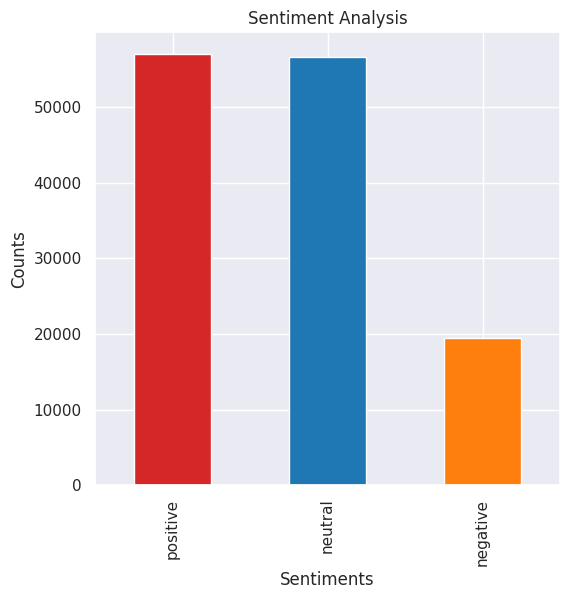

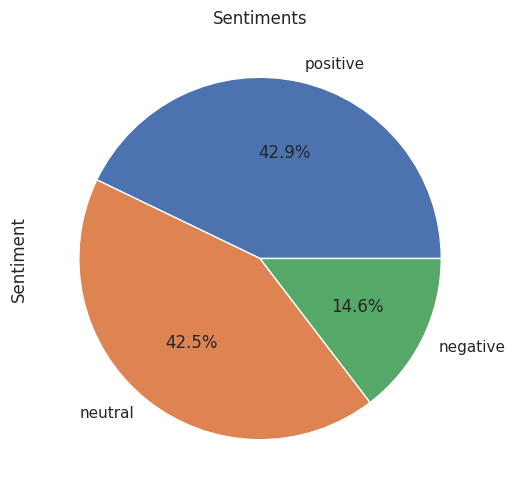

In [11]:
plt.figure(figsize=(6,6), dpi=100)
tweets_dataframe['Sentiment'].value_counts().plot(kind='bar', color = ['tab:red', 'tab:blue', 'tab:orange'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

plt.figure(figsize=(6,6), dpi=100)
tweets_dataframe['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%',)
plt.title('Sentiments')
plt.show()

In [12]:
datetime_data = tweets_dataframe.sort_values(by='Datetime')
datetime_data['date'] = pd.to_datetime(datetime_data['Datetime']).dt.date

datetime_data_positive = datetime_data.loc[(datetime_data['Sentiment']=='positive') == True]
datetime_data_negative = datetime_data.loc[(datetime_data['Sentiment']=='negative') == True]

In [13]:
datetime_data_positive.head()

,Datetime,Tweet Id,Text,Username,Sentiment,Compound,date
103,2022-11-30 18:22:04+00:00,1598019548204396545,Just in research early stage GPT optimised...,mssawan,positive,0.4019,2022-11-30
102,2022-11-30 18:26:58+00:00,1598020781065527296,OK so new can basically just generate prompts ...,GuyP,positive,0.4824,2022-11-30
101,2022-11-30 18:31:23+00:00,1598021893386571777,ChatGPT first look This thing is incredible ...,StuJLans,positive,0.6240,2022-11-30
100,2022-11-30 18:33:33+00:00,1598022438159552512,s new is insane Prompt An article about SEO...,david_teather,positive,0.0772,2022-11-30
99,2022-11-30 18:38:46+00:00,1598023748615311361,Si je lui demande qu est ce que le loebner pri...,jessyseonoob,positive,0.4404,2022-11-30


In [14]:
p_date_mean = datetime_data_positive.groupby('date')['Compound'].mean().reset_index()
n_date_mean = datetime_data_negative.groupby('date')['Compound'].mean().reset_index()

In [15]:
p_date_mean

,date,Compound
0,2022-11-30,0.556841
1,2022-12-01,0.530522
2,2022-12-02,0.529392
3,2022-12-03,0.540552
4,2022-12-04,0.536162
...,...,...
63,2023-02-01,0.518880
64,2023-02-02,0.509622
65,2023-02-03,0.512414
66,2023-02-04,0.534156


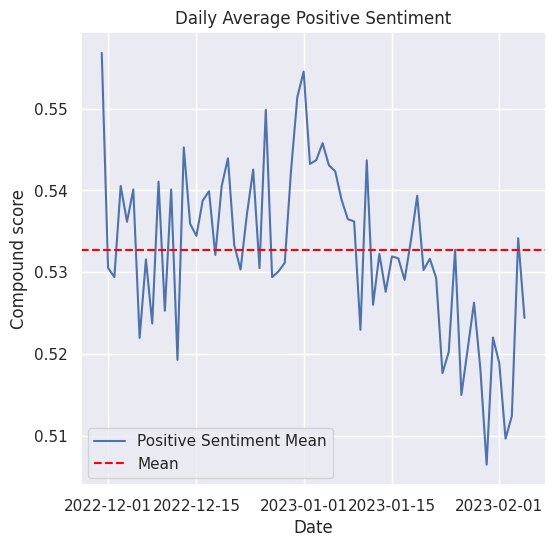

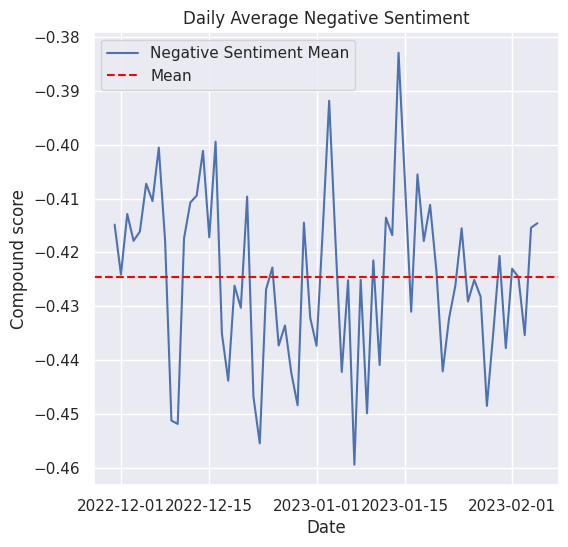

In [16]:
# Plot the positive sentiment mean 
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.plot(p_date_mean['date'], p_date_mean['Compound'], label='Positive Sentiment Mean')
ax.axhline(p_date_mean['Compound'].mean(), color='red', linestyle='--', label='Mean')
ax.set_title('Daily Average Positive Sentiment')
ax.set_xlabel('Date')
ax.set_ylabel('Compound score')
ax.legend()

# Plot the negative sentiment mean 
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.plot(n_date_mean['date'], n_date_mean['Compound'], label='Negative Sentiment Mean')
ax.axhline(n_date_mean['Compound'].mean(), color='red', linestyle='--', label='Mean')
ax.set_title('Daily Average Negative Sentiment')
ax.set_xlabel('Date')
ax.set_ylabel('Compound score')
ax.legend()


In [17]:
date_mean = datetime_data.groupby('date')['Compound'].mean().reset_index()

In [18]:
date_mean.head()

,date,Compound
0,2022-11-30,0.213444
1,2022-12-01,0.112712
2,2022-12-02,0.167644
3,2022-12-03,0.163713
4,2022-12-04,0.172151


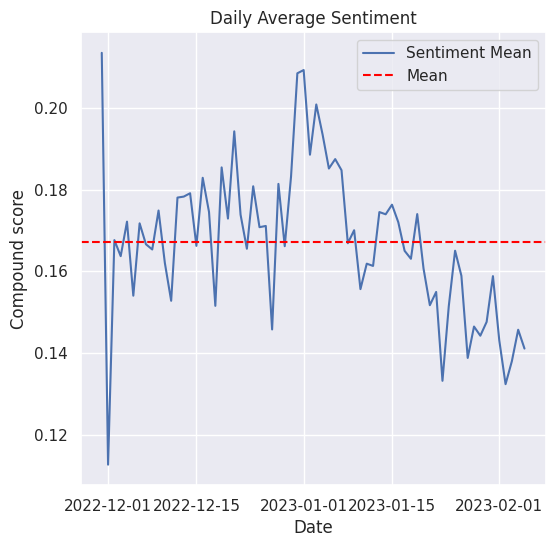

In [21]:
# Plot the sentiment mean 
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.plot(date_mean['date'], date_mean['Compound'], label='Sentiment Mean')
ax.axhline(date_mean['Compound'].mean(), color='red', linestyle='--', label='Mean')
ax.set_title('Daily Average Sentiment')
ax.set_xlabel('Date')
ax.set_ylabel('Compound score')
ax.legend()